# Simple Classification

In [4]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')

## Choose the necessary def from the mp1.py

In [6]:
def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i, end=' ')
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    return [X_test, Y_test]

## Generate a training set of images of simple geometric shapes

In [42]:
[X_train, Y_train] = generate_dataset_classification(300, 20)

Creating data:
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 

In [43]:
y_train = to_categorical(Y_train)

## Start to build the model

In [44]:
n_cols = X_train.shape[1]
model = Sequential()
model.add(Dense(3, activation='softmax', input_shape = (n_cols,)))

## Using the stochastic gradient descent optimizer

In [45]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
model.fit(X_train, y_train, nb_epoch=30, batch_size=32)

Epoch 1/30
300/300 [==============================] - 0s 1ms/step - loss: 7.0465 - acc: 0.3633
Epoch 2/30
300/300 [==============================] - 0s 192us/step - loss: 9.6442 - acc: 0.3167
Epoch 3/30
300/300 [==============================] - 0s 173us/step - loss: 8.6289 - acc: 0.3567
Epoch 4/30
300/300 [==============================] - 0s 171us/step - loss: 9.4266 - acc: 0.3567
Epoch 5/30
300/300 [==============================] - 0s 174us/step - loss: 7.9814 - acc: 0.3533
Epoch 6/30
300/300 [==============================] - 0s 171us/step - loss: 8.4118 - acc: 0.3800
Epoch 7/30
300/300 [==============================] - 0s 170us/step - loss: 7.8144 - acc: 0.3600
Epoch 8/30
300/300 [==============================] - 0s 173us/step - loss: 8.5789 - acc: 0.3400
Epoch 9/30
300/300 [==============================] - 0s 171us/step - loss: 7.8145 - acc: 0.4033
Epoch 10/30
300/300 [==============================] - 0s 171us/step - loss: 8.0159 - acc: 0.3733
Epoch 11/30
300/300 [==========

In [47]:
# The final value of loss function is high and accuracy rate is low, so the result is not good.

### check my classifier

In [48]:
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[0., 1., 0.]], dtype=float32)

In [49]:
[X_test, v] = generate_a_triangle()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[1., 0., 0.]], dtype=float32)

In [50]:
X_test = generate_a_rectangle()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[1., 0., 0.]], dtype=float32)

### 4.Visualization of the Solution

#### Getting weights

In [51]:
[W1, W2] = model.get_weights()
w10 = W1[:,0]
w11 = W1[:,1]
w12 = W1[:,2]

#### Visualization

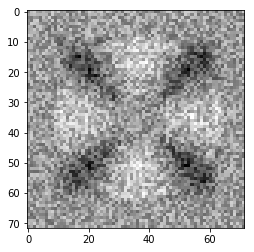

In [52]:
plt.imshow(w10.reshape(72,72), cmap='gray')

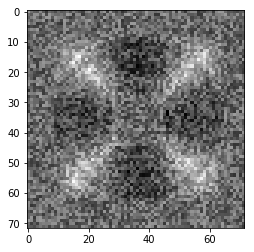

In [53]:
plt.imshow(w11.reshape(72,72), cmap='gray')

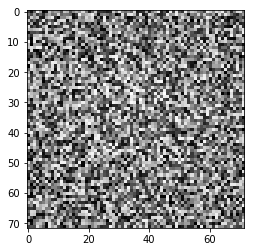

In [54]:
plt.imshow(w12.reshape(72,72), cmap='gray')

In [55]:
# It seems that the stochastic gradient descent optimizer's results are not so good, 
# so next I will turn to the Adam optimizer

## Using the Adam optimizer

In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
model.fit(X_train, y_train, nb_epoch=30, batch_size=32)

Epoch 1/30
300/300 [==============================] - 0s 1ms/step - loss: 1.7071 - acc: 0.3167
Epoch 2/30
300/300 [==============================] - 0s 187us/step - loss: 0.9197 - acc: 0.5667
Epoch 3/30
300/300 [==============================] - 0s 186us/step - loss: 0.7069 - acc: 0.6667
Epoch 4/30
300/300 [==============================] - 0s 188us/step - loss: 0.6216 - acc: 0.7133
Epoch 5/30
300/300 [==============================] - 0s 189us/step - loss: 0.4107 - acc: 0.8167
Epoch 6/30
300/300 [==============================] - 0s 191us/step - loss: 0.3267 - acc: 0.9300
Epoch 7/30
300/300 [==============================] - 0s 201us/step - loss: 0.3289 - acc: 0.8500
Epoch 8/30
300/300 [==============================] - 0s 219us/step - loss: 0.2897 - acc: 0.8900
Epoch 9/30
300/300 [==============================] - 0s 195us/step - loss: 0.2349 - acc: 0.9667
Epoch 10/30
300/300 [==============================] - 0s 193us/step - loss: 0.2256 - acc: 0.9500
Epoch 11/30
300/300 [==========

In [41]:
# The value of loss function decreases a lot using Adam optimizer and the accuracy rate is increasing a lot too.

### check my classifier

In [33]:
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[0., 1., 0.]], dtype=float32)

In [34]:
[X_test, v] = generate_a_triangle()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[0., 0., 1.]], dtype=float32)

In [35]:
X_test = generate_a_rectangle()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[1., 0., 0.]], dtype=float32)

### 4.Visualization of the Solution

#### Getting weights

In [36]:
[W1, W2] = model.get_weights()
w10 = W1[:,0]
w11 = W1[:,1]
w12 = W1[:,2]

#### Visualization

##### Rectangle

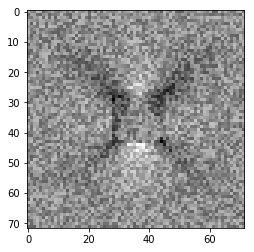

In [37]:
plt.imshow(w10.reshape(72,72), cmap='gray')

##### Disk

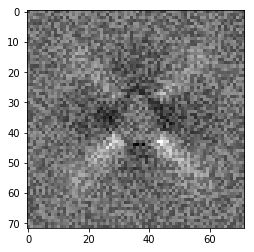

In [38]:
plt.imshow(w11.reshape(72,72), cmap='gray')

##### Triangle

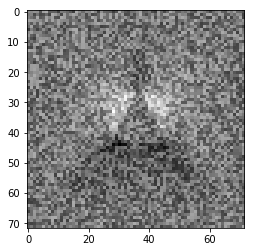

In [39]:
plt.imshow(w12.reshape(72,72), cmap='gray')

In [40]:
# The results of Adam optimizer is much better and clear.

# A More Difficult Classification Problem

In [56]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')

## Choose the necessary def from the mp1.py

In [57]:
def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i, end=' ')
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    return [X_test, Y_test]

## Generate new training and testing set 

In [58]:
[X_train, Y_train] = generate_dataset_classification(300, 20, True)
[X_test, Y_test] = generate_test_set_classification()

Creating data:
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 Creating data:
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 

In [59]:
X_train = X_train.reshape(len(X_train), 72, 72, 1)
X_test = X_test.reshape(len(X_test), 72, 72, 1)
y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)

## Build and Compile the model

In [60]:
model = Sequential()
model.add(Conv2D(kernel_size=(5, 5), padding="same",input_shape=(72, 72, 1),filters=16, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

In [61]:
model.add(Conv2D(32, (5, 5), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

In [62]:
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [63]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Training the model

In [64]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Train on 300 samples, validate on 300 samples
Epoch 1/10
300/300 [==============================] - 22s 72ms/step - loss: 1.2683 - acc: 0.3933 - val_loss: 1.0366 - val_acc: 0.5000
Epoch 2/10
300/300 [==============================] - 21s 70ms/step - loss: 0.9532 - acc: 0.6433 - val_loss: 0.8113 - val_acc: 0.6067
Epoch 3/10
300/300 [==============================] - 22s 73ms/step - loss: 0.7294 - acc: 0.7000 - val_loss: 0.7232 - val_acc: 0.6700
Epoch 4/10
300/300 [==============================] - 21s 70ms/step - loss: 0.6067 - acc: 0.7433 - val_loss: 0.6782 - val_acc: 0.6867
Epoch 5/10
300/300 [==============================] - 22s 72ms/step - loss: 0.4548 - acc: 0.8200 - val_loss: 0.6629 - val_acc: 0.7200
Epoch 6/10
300/300 [==============================] - 21s 71ms/step - loss: 0.3136 - acc: 0.9000 - val_loss: 0.6396 - val_acc: 0.7567
Epoch 7/10
300/300 [==============================] - 21s 69ms/step - loss: 0.2357 - acc: 0.9233 - val_loss: 0.7052 - val_acc: 0.7433
Epoch 8/10
300/3

In [65]:
# We can see that finally in the training set we will get the value of 
# loss function of 0.0469 and the accuracy rate of 0.9900.

## Valuate my classifier on this test set

In [66]:
model.evaluate(X_test, y_test)

300/300 [==============================] - 4s 14ms/step


[0.6620845818519592, 0.7966666666666666]

In [67]:
# The value of loss function in testing set is 0.662 and accuracy rate is 0.797.

# A Regression Problem

In [68]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
import math
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')

## Choose the necessary def from the mp1.py

In [69]:
def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i, end=' ')
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y, z):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((72,72))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)
    
    xy = z.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'g', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)
    
    print(y, ':', z)
    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]

def normal_triangle(Y):
    
    G = [(Y[0]+Y[2]+Y[4])/3.0, (Y[1]+Y[3]+Y[5])/3.0]
    
    p =[[Y[0],Y[1], math.sqrt(Y[0]**2 + Y[1]**2)],
        [Y[2],Y[3], math.sqrt(Y[2]**2 + Y[3]**2)],
        [Y[4],Y[5], math.sqrt(Y[4]**2 + Y[5]**2)]]
    
    p.sort(key=lambda x:x[2])
        
    y = np.array([p[0][0], p[0][1], p[1][0], p[1][1], p[2][0], p[2][1]])
    return y

## Generate a training and testing set 

In [71]:
[X_train, Y_train] = generate_dataset_regression(300, 20)
[X_test, Y_test] = generate_test_set_regression()

Creating data:
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 Creating data:
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 

In [72]:
nb_train = len(X_train)
nb_test = len(X_test)
y_train = np.zeros([nb_train, 6])
y_test = np.zeros([nb_test, 6])
for i in range(nb_train):
    y_train[i] = normal_triangle(Y_train[i])
for i in range(nb_test):
    y_test[i] = normal_triangle(Y_test[i])
    
x_train = X_train.reshape(len(X_train), 72, 72, 1)
x_test = X_test.reshape(len(X_test), 72, 72, 1)

## Model setting and compiling

In [73]:
model = Sequential()
model.add(Conv2D(filters=32, activation="relu", input_shape=(72, 72, 1), kernel_size=(3, 3), padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))    
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(6))

In [74]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=6, batch_size=32, validation_data=(x_test, y_test))

Train on 300 samples, validate on 300 samples
Epoch 1/6
300/300 [==============================] - 18s 61ms/step - loss: 0.1377 - acc: 0.3667 - val_loss: 0.0652 - val_acc: 0.5133
Epoch 2/6
300/300 [==============================] - 19s 64ms/step - loss: 0.0571 - acc: 0.5967 - val_loss: 0.0537 - val_acc: 0.5633
Epoch 3/6
300/300 [==============================] - 19s 62ms/step - loss: 0.0423 - acc: 0.6667 - val_loss: 0.0441 - val_acc: 0.6167
Epoch 4/6
300/300 [==============================] - 18s 61ms/step - loss: 0.0343 - acc: 0.6900 - val_loss: 0.0401 - val_acc: 0.6200
Epoch 5/6
300/300 [==============================] - 17s 58ms/step - loss: 0.0290 - acc: 0.6700 - val_loss: 0.0375 - val_acc: 0.5967
Epoch 6/6
300/300 [==============================] - 18s 61ms/step - loss: 0.0238 - acc: 0.7100 - val_loss: 0.0350 - val_acc: 0.5633


In [75]:
# The final result shows that the value of loss function is 0.0238, the accuracy rate is 0.7100. 
# The result is not so perfect, 
# and it will also reflect in the visualization of the solution, 
# I take a 12 samples to present the solut.

## Random select some of the set for visulation

In [78]:
import random
Y_pred = model.predict(x_test, batch_size=32)
list = range(300) 
slice = random.sample(list, 12)

[0.35003728 0.19800384 0.473556   0.34364203 0.6739784  0.5308396 ] : [0.71195668 0.04439405 0.42333901 0.23609036 0.34811195 0.69527005]


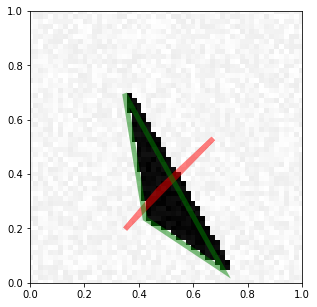

[0.1054423  0.04779717 0.39389208 0.19741726 0.44980958 0.5043399 ] : [0.31362148 0.0616955  0.54988626 0.44749946 0.06910587 0.13292267]


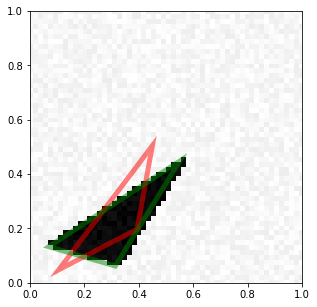

[0.4241542  0.7839394  0.5952845  0.769819   0.47161973 1.0340543 ] : [0.604492   0.54193544 0.99704646 0.52602499 0.00985288 0.98358739]


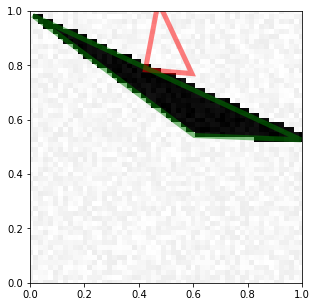

[0.27314982 0.20159703 0.4496028  0.2656067  0.6105109  0.45014095] : [0.16056395 0.46608283 0.62148792 0.39922604 0.68992973 0.04520399]


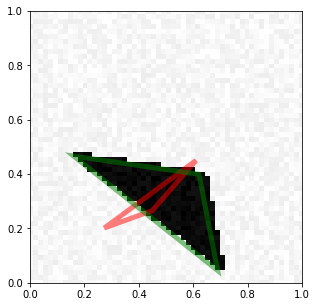

[0.598903   0.3536462  0.6984154  0.59791106 0.9177373  0.76412016] : [0.50439528 0.42124342 0.79682106 0.71684654 0.99551535 0.58341613]


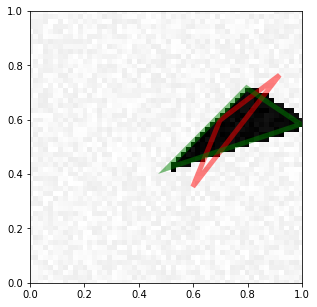

[0.1996808  0.34345156 0.27450576 0.55810165 0.37015077 0.9359057 ] : [0.20540655 0.84964789 0.74391339 0.60060416 0.12283285 0.36254237]


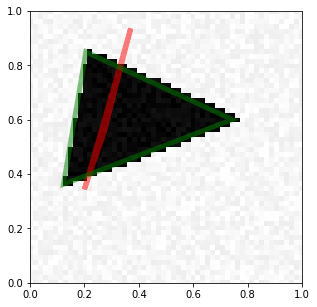

[0.21172367 0.55437016 0.49748695 0.44780827 0.6433175  0.4971494 ] : [0.82410148 0.11815852 0.24831941 0.91934667 0.27962969 0.46965845]


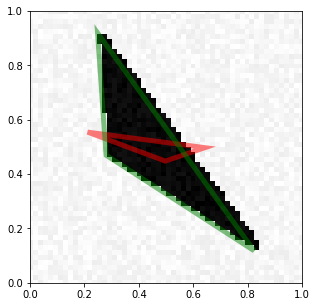

[0.25208429 0.560055   0.43550482 0.44180176 0.5605745  0.42894703] : [0.90236089 0.08107216 0.0619128  0.90561447 0.3103926  0.44943384]


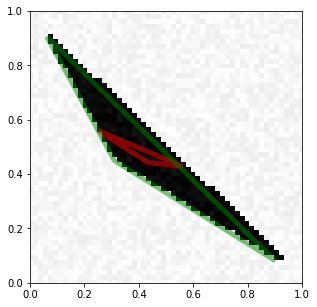

[0.26490074 0.28663796 0.39125976 0.48139176 0.5818093  0.6892609 ] : [0.61134504 0.77155581 0.21487756 0.22677233 0.39666126 0.45811595]


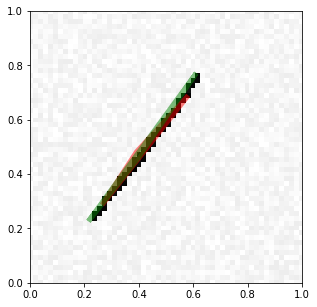

[0.25243813 0.36141208 0.6198427  0.25496218 0.885324   0.26849562] : [0.10944216 0.46587888 0.94062007 0.03699694 0.78048722 0.50799717]


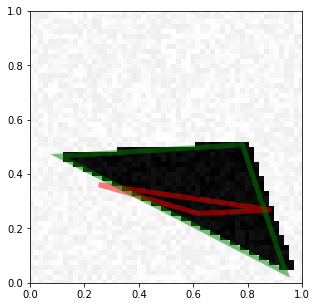

[0.5621771  0.5225535  0.6958986  0.74789685 0.8881294  1.0346017 ] : [0.44264321 0.85795995 0.8274925  0.48768525 0.89645274 0.79994217]


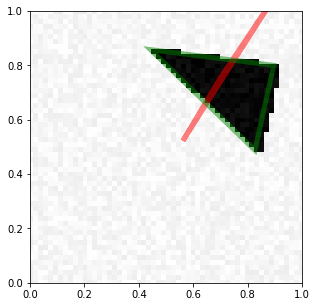

[0.30086663 0.27032295 0.17604986 0.46345142 0.20308124 0.67511314] : [0.36531208 0.17978622 0.11045017 0.71900576 0.35575288 0.32451984]


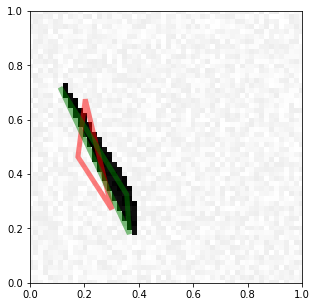

In [79]:
for i in slice:
     visualize_prediction(X_test[i], Y_pred[i], Y_test[i])

In [80]:
# We can see from the picture that, green part is the actual image, 
# and the red part is the prediction. 
# The result of the prediction are not so perfect, 
# which can also be observed according to the accuracy rate.

# Image Denoising

In [81]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Activation
from keras.models import Model
import random
import warnings
warnings.filterwarnings('ignore')

## Include changes to original codes

In [82]:
def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    x = generate_a_drawing(figsize, U, V, noise)
    y = generate_a_drawing(figsize, U, V, 0)
    return [x, y]

def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    x = generate_a_drawing(figsize, U, V, noise)
    y = generate_a_drawing(figsize, U, V, 0)
    return [x, y]

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    x = generate_a_drawing(figsize, U, V, noise)
    y = generate_a_drawing(figsize, U, V, 0)
    return [x, y]

# Make some changes to remove the noise

def generate_dataset_denoising(nb_samples, free_location=False):
    # Getting im_size:
    im1, im2 = generate_a_rectangle()
    im_size = im1.shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples,im_size])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i, end=' ')
        category = np.random.randint(3)
        noise=np.random.randint(100)
        if category == 0:
            [X[i], Y[i]] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            [X[i], Y[i]] = generate_a_disk(noise, free_location)
        else:
            [X[i], Y[i]] = generate_a_triangle(noise, free_location)
    X = X / 255.0
    Y = Y / 255.0
    return [X, Y]

def generate_test_set_denoising():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_denoising(300, True)
    return [X_test, Y_test]

## Generate new training and test sets

In [83]:
[X_train_noise, X_train_clean] = generate_dataset_denoising(300, True)
[X_test_noise, X_test_clean] = generate_test_set_denoising()

Creating data:
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 Creating data:
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 

In [84]:
x_train_clean = X_train_clean.reshape(len(X_train_clean), 72, 72, 1)
x_train_noise = X_train_noise.reshape(len(X_train_noise), 72, 72, 1)
x_test_clean = X_test_clean.reshape(len(X_test_clean), 72, 72, 1)
x_test_noise = X_test_noise.reshape(len(X_test_noise), 72, 72, 1)
input_img = Input(shape=(72, 72, 1))

## Compile the model

In [85]:
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

In [86]:
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [87]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [88]:
autoencoder.fit(x_train_noise, x_train_clean, epochs=10, batch_size=32, shuffle=True, validation_data=(x_test_noise, x_test_clean))

Train on 300 samples, validate on 300 samples
Epoch 1/10
300/300 [==============================] - 32s 107ms/step - loss: 0.5119 - acc: 0.8244 - val_loss: 0.2213 - val_acc: 0.9156
Epoch 2/10
300/300 [==============================] - 33s 109ms/step - loss: 0.2148 - acc: 0.9161 - val_loss: 0.1736 - val_acc: 0.9623
Epoch 3/10
300/300 [==============================] - 32s 105ms/step - loss: 0.1136 - acc: 0.9641 - val_loss: 0.0651 - val_acc: 0.9869
Epoch 4/10
300/300 [==============================] - 31s 104ms/step - loss: 0.0444 - acc: 0.9870 - val_loss: 0.0306 - val_acc: 0.9893
Epoch 5/10
300/300 [==============================] - 31s 102ms/step - loss: 0.0291 - acc: 0.9897 - val_loss: 0.0324 - val_acc: 0.9891
Epoch 6/10
300/300 [==============================] - 31s 103ms/step - loss: 0.0264 - acc: 0.9907 - val_loss: 0.0246 - val_acc: 0.9915
Epoch 7/10
300/300 [==============================] - 34s 113ms/step - loss: 0.0228 - acc: 0.9919 - val_loss: 0.0245 - val_acc: 0.9909
Epoch 8/1

In [90]:
# We can see that the final value of loss function is 0.0184 and the accuracy rate is 0.9932.

## Make the prediction and take some examples

In [89]:
x_pred_clean = autoencoder.predict(x_test_noise, batch_size=32)

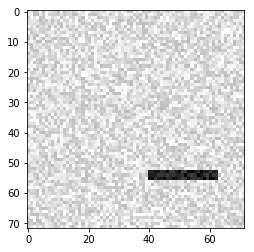

In [93]:
plt.imshow(x_test_noise[0].reshape(72,72), cmap='gray')

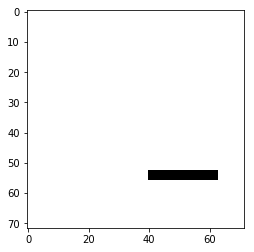

In [94]:
plt.imshow(x_test_clean[0].reshape(72,72), cmap='gray')

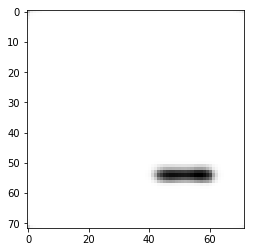

In [95]:
plt.imshow(x_pred_clean[0].reshape(72,72), cmap='gray')

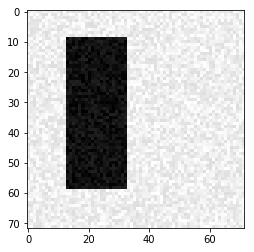

In [96]:
plt.imshow(x_test_noise[88].reshape(72,72), cmap='gray')

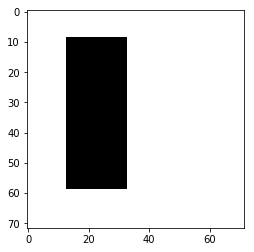

In [97]:
plt.imshow(x_test_clean[88].reshape(72,72), cmap='gray')

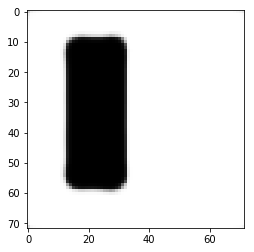

In [98]:
plt.imshow(x_pred_clean[88].reshape(72,72), cmap='gray')

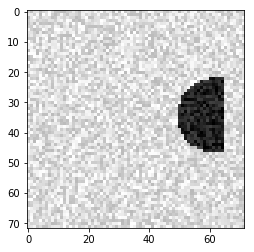

In [99]:
plt.imshow(x_test_noise[99].reshape(72,72), cmap='gray')

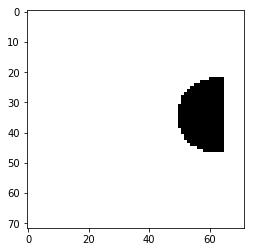

In [100]:
plt.imshow(x_test_clean[99].reshape(72,72), cmap='gray')

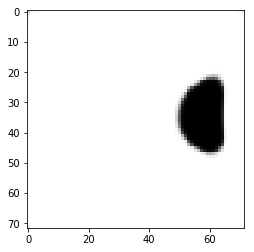

In [101]:
plt.imshow(x_pred_clean[99].reshape(72,72), cmap='gray')

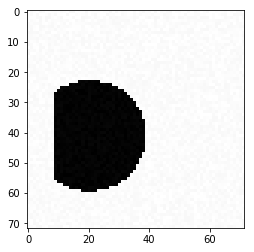

In [102]:
plt.imshow(x_test_noise[162].reshape(72,72), cmap='gray')

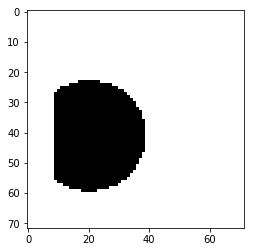

In [103]:
plt.imshow(x_test_clean[162].reshape(72,72), cmap='gray')

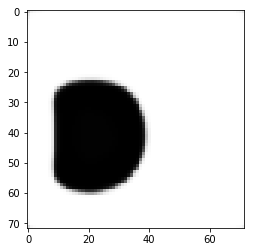

In [104]:
plt.imshow(x_pred_clean[162].reshape(72,72), cmap='gray')

In [105]:
# Also I take some samples to compare the denoising solution with with-noising solution,
# we can observe that denoised results are less clear than the nosiy ones.